# Energie Erhaltung

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

## Modell Beispiel

Als Modellbeispiel betrachten wir das Anfangswertproblem

$$\begin{split}
\dot{x}(t) & = y(t)\\
\dot{y}(t) & = -x(t)	
\end{split}$$

mit $x(0)=0, y(0)=1$. Die analytische Lösung ist gegeben durch

$$(x(t),y(t)) = (\sin(t),\cos(t)).$$

Die Lösung erfüllt

$$E = x(t)^2 + y(t)^2 \equiv 1\quad \forall t\in\mathbb{R}.$$

Ein numerisches Verfahren, welches die Energie $E$ (vgl. Skript) erhält, nennen wir **konservativ**.

In [2]:
def f(t,x):
    return np.array([x[1],-x[0]])

In [3]:
t,x1,x2,y1,y2,h = symbols('t,x1,x2,y1,y2,h')

## Implizit Euler

Wir betrachten die implizite Euler Methode:

$$\begin{pmatrix}x_{n+1}\\y_{n+1}\end{pmatrix} =  \begin{pmatrix}x_{n}\\y_{n}\end{pmatrix} + h\cdot 
f\left(t+h,\begin{pmatrix}x_{n+1}\\y_{n+1}\end{pmatrix}\right)$$

und berechnen algebraisch (das System ist linear!) die Lösung für den neuen Zeitschritt:

In [4]:
sol=solve(np.array([x2,y2]) - np.array([x1,y1]) - h*f(t+h,[x2,y2]),[x2,y2])
sol

{y2: (-h*x1 + y1)/(h**2 + 1), x2: (h*y1 + x1)/(h**2 + 1)}

Damit folgt für $x_{k+1}^2+y_{k+1}^2$:

In [5]:
simplify((x2.subs(sol))**2+(y2.subs(sol))**2)

(x1**2 + y1**2)/(h**2 + 1)

In jedem Schritt "verbraucht" das Verfahren Energie und ist somit nicht konservativ!

## Implizite Mittelpunkt-Regel

Für die implizite Mittelpunkt-Regel gilt (in der Steigungsform):

$$\begin{split}\begin{pmatrix}r_{x}\\r_{y}\end{pmatrix} & = f\left(t+\frac{h}{2}, \begin{pmatrix}x_{n}\\y_{n}\end{pmatrix} + \frac{h}{2}\cdot \begin{pmatrix}r_{x}\\r_{y}\end{pmatrix}\right)\\
\begin{pmatrix}x_{n+1}\\y_{n+1}\end{pmatrix} & = \begin{pmatrix}x_{n}\\y_{n}\end{pmatrix} + h \cdot \begin{pmatrix}r_{x}\\r_{y}\end{pmatrix}\end{split}$$

Die Lösung für den neuen Zeitschritt:

In [6]:
t,x1,x2,y1,y2,rx,ry,h = symbols('t,x1,x2,y1,y2,rx,ry,h')

In [7]:
sol=solve(np.array([rx,ry]) - f(t+h/2,np.array([x1,y1])+h/2*np.array([rx,ry])),[rx,ry])
sol

{ry: -(2*h*y1 + 4*x1)/(h**2 + 4), rx: (-2*h*x1 + 4*y1)/(h**2 + 4)}

In [8]:
x2 = x1+h*rx
y2 = y1+h*ry

Damit folgt für $x_{k+1}^2+y_{k+1}^2$:

In [9]:
simplify((x2.subs(sol))**2+(y2.subs(sol))**2)

x1**2 + y1**2

Die Energie bleibt damit erhalten. Das Verfahren ist konservativ.

## Implizite Trapezmethode

Für die implizite Trapezmethode gilt (in der Steigungsform):

$$
\begin{pmatrix}x_{n+1}\\y_{n+1}\end{pmatrix} = \begin{pmatrix}x_{n}\\y_{n}\end{pmatrix} + \frac{h}{2} \cdot \left(f\left(t, \begin{pmatrix}x_{n}\\y_{n}\end{pmatrix}\right)+f\left(t+h, \begin{pmatrix}x_{n+1}\\y_{n+1}\end{pmatrix}\right)\right)$$

Die Lösung für den neuen Zeitschritt:

In [10]:
t,x1,x2,y1,y2,h = symbols('t,x1,x2,y1,y2,h')

In [11]:
sol=solve(np.array([x2,y2]) - np.array([x1,y1]) - h/2*(f(t,np.array([x1,y1]))+f(t+h,np.array([x2,y2]))),[x2,y2])
sol

{y2: (-h**2*y1 - 4*h*x1 + 4*y1)/(h**2 + 4),
 x2: (-h**2*x1 + 4*h*y1 + 4*x1)/(h**2 + 4)}

Damit folgt für $x_{k+1}^2+y_{k+1}^2$:

In [12]:
simplify((x2.subs(sol))**2+(y2.subs(sol))**2)

x1**2 + y1**2

Die Energie bleibt damit erhalten. Das Verfahren ist ebenfalls konservativ.

## Verfahren nach Hammer-Hollingsworth

Genauso kann gezeigt werden, dass das zweistufige Verfahren nach Hammer-Hollingsworth ebenso konservativ ist:

In [13]:
from sympy.matrices import Matrix

In [14]:
def f(t,x):
    return Matrix([x[1],-x[0]])

In [15]:
t,x1,x2,y1,y2,r1x,r1y,r2x,r2y,h = symbols('t,x1,x2,y1,y2,r1x,r1y,r2x,r2y,h')

In [16]:
r1 = Matrix([r1x,r1y])
r2 = Matrix([r2x,r2y])

In [17]:
cHH = Matrix([(3-sqrt(3))/6,(3+sqrt(3))/6])
aHH = Matrix([[1/4,(1/4-sqrt(3)/6)],[(1/4+sqrt(3)/6),1/4]])
bHH = Matrix([1/2,1/2])

Da wir es hier mit einem zwei stufigen Verfahren zu tun haben, sind die die beiden Richtungsvektoren $r_1, r_2$ gesucht. Wir erhalten daher im Beispiel ein Gleichungssystem mit 4 Unbekannten $(r_{1,x}, r_{1,y}), (r_{2,x}, r_{2,y})$:

In [18]:
sol=solve([r1-f(t+cHH[0]*h,Matrix([x1,y1])+h*(aHH[0,0]*r1+aHH[0,1]*r2)),
           r2-f(t+cHH[1]*h,Matrix([x1,y1])+h*(aHH[1,0]*r1+aHH[1,1]*r2))],[r1x,r1y,r2x,r2y])
sol

{r1x: (-3.46410161513775*h**3*x1 + 8.78460969082653*h**2*y1 - 30.4307806183469*h*x1 + 144.0*y1)/(h**4 + 12.0*h**2 + 144.0),
 r1y: (-3.46410161513775*h**3*y1 - 8.78460969082653*h**2*x1 - 30.4307806183469*h*y1 - 144.0*x1)/(h**4 + 12.0*h**2 + 144.0),
 r2x: 2.0*(1.73205080756888*h**3*x1 - 16.3923048454133*h**2*y1 - 56.7846096908265*h*x1 + 72.0*y1)/(h**4 + 12.0*h**2 + 144.0),
 r2y: 2.0*(1.73205080756888*h**3*y1 + 16.3923048454133*h**2*x1 - 56.7846096908265*h*y1 - 72.0*x1)/(h**4 + 12.0*h**2 + 144.0)}

In [19]:
x2 = x1 + h*bHH.dot([r1x,r2x])
y2 = y1 + h*bHH.dot([r1y,r2y])

Damit folgt für $x_{k+1}^2+y_{k+1}^2$:

In [20]:
simplify((x2.subs(sol))**2+(y2.subs(sol))**2)

1.0*x1**2 + 1.0*y1**2

Die Energie bleibt damit erhalten. Das Verfahren ist ebenfalls konservativ.

## Klassisches Runge-Kutta Verfahren 4. Ordnung

Zum Abschluss betrachten wir das klassische Runge-Kutta Verfahren 4. Ordnung.

In [21]:
def f(t,x):
    return np.array([x[1],-x[0]])

In [22]:
t,x1,x2,y1,y2,h = symbols('t,x1,x2,y1,y2,h')

In [23]:
r1 = f(t,np.array([x1,y1]))
r2 = f(t+h/2,np.array([x1,y1])+h/2*r1)
r3 = f(t+h/2,np.array([x1,y1])+h/2*r2)
r4 = f(t+h,np.array([x1,y1])+h*r3)

In [24]:
[x2,y2] = np.array([x1,y1]) + h/6*(r1+2*r2+2*r3+r4)

Damit folgt für $x_{k+1}^2+y_{k+1}^2$:

In [25]:
E = factor((x2.subs(sol))**2+(y2.subs(sol))**2)
E

(x1**2 + y1**2)*(h**8 - 8*h**6 + 576)/576

In [26]:
kappa = lambdify(h,E.subs({x1:1,y1:0}))

Nur mit einer Schrittweite von $h=2\sqrt{2}$ oder $h=0$ ist das Verfahren konservativ! Für kleine Schrittweiten ist das Verfahren jedoch nahezu konservativ. Der Fehler geht sehr schnell mit $h^6$ gegen Null.

In [27]:
solve(E.subs({x1:1,y1:0})-1,h)

[0, -2*sqrt(2), 2*sqrt(2)]

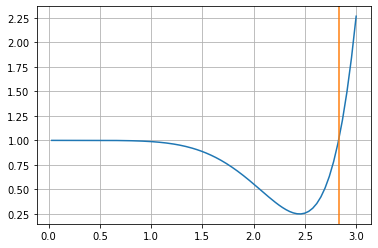

In [28]:
hs = 10**np.linspace(-1.5,np.log10(3),300)
plt.plot(hs,kappa(hs))
plt.axvline(2*np.sqrt(2),c='tab:orange')
plt.grid()